In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 909s 5us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Now lets plot some images to see what they are:

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

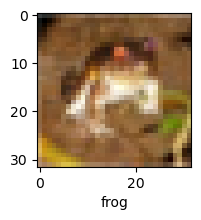

In [12]:
plot_sample(X_train, y_train, 0)

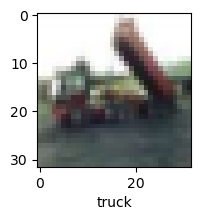

In [13]:
plot_sample(X_train, y_train, 2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

#Normalizing the training data

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#Build simple artificial neural network for image classification

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 117s 73ms/step - loss: 1.8144 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6243 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5448 - accuracy: 0.4535
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4844 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 102s 66ms/step - loss: 1.4340 - accuracy: 0.4944


You can see that at the end of 5 epochs, accuracy is at around 49%

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.69      0.51      1000
           1       0.65      0.53      0.59      1000
           2       0.43      0.27      0.33      1000
           3       0.36      0.36      0.36      1000
           4       0.43      0.42      0.42      1000
           5       0.47      0.24      0.32      1000
           6       0.50      0.56      0.53      1000
           7       0.46      0.64      0.54      1000
           8       0.57      0.63      0.60      1000
           9       0.62      0.48      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



#Now let us build a convolutional neural network to train our images

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.4775 - accuracy: 0.4711
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1045 - accuracy: 0.6125
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9802 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9007 - accuracy: 0.6849
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8363 - accuracy: 0.7097
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7789 - accuracy: 0.7292
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7257 - accuracy: 0.7466
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6811 - accuracy: 0.7621
Epoch 9/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6392 - accuracy: 0.7775
Epoch 10/10
1563/1563 [==============================] - 46s 30m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9453 - accuracy: 0.6946


[0.9452577233314514, 0.694599986076355]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.36244455e-02, 8.00645794e-04, 4.58790222e-03, 7.87800133e-01,
        3.50175761e-02, 1.17912337e-01, 3.63907181e-02, 3.77621473e-04,
        1.90578739e-03, 1.58276723e-03],
       [7.77696900e-04, 3.36213820e-02, 6.08085486e-07, 9.78210210e-06,
        1.09489264e-07, 7.44335921e-07, 1.02064960e-05, 2.44745729e-06,
        9.65154231e-01, 4.22781741e-04],
       [1.95312306e-01, 3.52753639e-01, 1.16497157e-02, 3.53003107e-02,
        9.92912333e-03, 3.69744678e-03, 1.96987577e-03, 2.83391844e-03,
        1.95889547e-01, 1.90664068e-01],
       [9.21238303e-01, 6.40233688e-04, 5.31048561e-03, 5.55198749e-05,
        1.03023951e-03, 2.17000078e-07, 4.79834443e-06, 8.00823784e-07,
        7.17162788e-02, 3.06810080e-06],
       [1.15953735e-05, 4.14941460e-05, 1.73491531e-03, 1.77297220e-02,
        1.31629854e-01, 4.26058919e-04, 8.48219693e-01, 5.63675997e-07,
        1.41729091e-04, 6.41945589e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

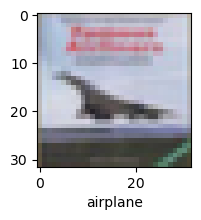

In [24]:
plot_sample(X_test, y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'

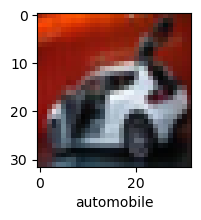

In [26]:
plot_sample(X_test, y_test,6)

In [27]:
classes[y_classes[6]]

'automobile'